# Background Information

# Exploratory Data Analysis

In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import math
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from scipy.cluster.hierarchy import dendrogram, linkage

init_notebook_mode(connected=True)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['athlete_events.csv', 'noc_regions.csv']


**Table Tennis Exploratory Data Analysis**

In [45]:
olympics = pd.read_csv('../input/athlete_events.csv')

In [46]:
# Clean the Team column
# Some of the entries in the column contain the country name followed by a dash and a number, such as China-2.
new_Team = [team[:-2] if team[-2] == '-' else team for team in olympics.Team]
olympics.Team = new_Team

tt_men = olympics.loc[(olympics.Sport == "Table Tennis") & (olympics.Sex == 'M')]
tt_women = olympics.loc[(olympics.Sport == "Table Tennis") & (olympics.Sex == 'F')]
tt_men_singles = olympics.loc[(olympics.Event == "Table Tennis Men's Singles")]

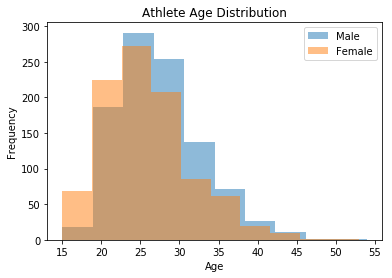

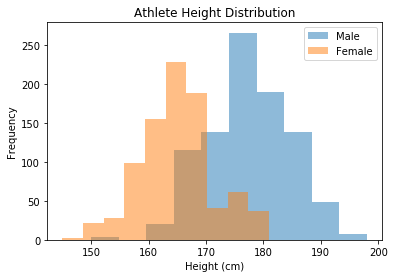

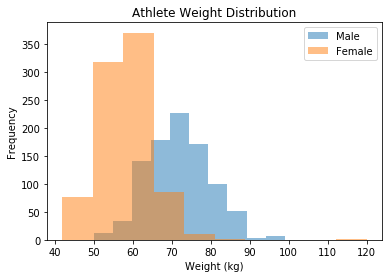

In [47]:
# Histograms for the age, height, and weight of table tennis players, grouped by gender
tt_men.Age.plot(kind='hist', title = 'Athlete Age Distribution', alpha=0.5, label = 'Male')
tt_women.Age.plot(kind='hist', alpha=0.5, label = 'Female')
plt.xlabel('Age')
plt.legend(loc ='upper right')
plt.show()

tt_men.Height.plot(kind='hist', title = 'Athlete Height Distribution', alpha=0.5, label = 'Male')
tt_women.Height.plot(kind='hist', alpha=0.5, label = 'Female')
plt.xlabel('Height (cm)')
plt.legend(loc ='upper right')
plt.show()

tt_men.Weight.plot(kind='hist', title = 'Athlete Weight Distribution', alpha=0.5, label = 'Male')
tt_women.Weight.plot(kind='hist', alpha=0.5, label = 'Female')
plt.xlabel('Weight (kg)')
plt.legend(loc ='upper right')
plt.show()

In [48]:
# Examine the huge outlier in the weight histogram
tt_women.loc[tt_women.Weight == tt_women.Weight.max()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
175296,88096,Patricia Akosua Offel,F,16.0,NaN,120.0,Ghana,GHA,1988 Summer,1988,Summer,Seoul,Table Tennis,Table Tennis Women's Singles,NaN


In [49]:
# Looking for a particular player I knew
tt_women.loc[tt_women.Name == 'Ariel Yenhua Hsing']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
99878,50528,Ariel Yenhua Hsing,F,16.0,165.0,53.0,United States,USA,2012 Summer,2012,Summer,London,Table Tennis,Table Tennis Women's Singles,NaN
99879,50528,Ariel Yenhua Hsing,F,16.0,165.0,53.0,United States,USA,2012 Summer,2012,Summer,London,Table Tennis,Table Tennis Women's Team,NaN


In [50]:
# Ariel defeated the oldest female athlete, Ni Xia Lian, in the round of 64
tt_women.loc[tt_women.Age == tt_women.Age.max()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
170648,85768,Xia Lian Ni,F,53.0,157.0,58.0,Luxembourg,LUX,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Women's Singles,NaN


In [51]:
# Is the oldest athlete male or female?
tt_men.loc[tt_men.Age == tt_men.Age.max()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
92660,46946,Zhiwen He Cheng,M,54.0,173.0,73.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Men's Singles,NaN


In [52]:
men_singles_bronze = tt_men_singles.loc[tt_men_singles.Medal == 'Bronze'].groupby('Year')['Year'].count()
men_singles_bronze

# Upon further research, there was no third place game played in 1992, leading to two bronze medals.

Year
1988    1
1992    2
1996    1
2000    1
2004    1
2008    1
2012    1
2016    1
Name: Year, dtype: int64

In [53]:
total_medals_country_men = tt_men.loc[pd.notnull(tt_men.Medal)].groupby('Team').Team.count()
total_medals_country_men

Team
China          37
Denmark         2
France          3
Germany        13
Hong Kong       2
Japan           4
South Korea    18
Sweden          3
Yugoslavia      2
Name: Team, dtype: int64

In [54]:
total_medals_country_women = tt_women.loc[pd.notnull(tt_women.Medal)].groupby('Team').Team.count()
total_medals_country_women

Team
China             44
Chinese Taipei     2
Germany            3
Japan              6
North Korea        5
Singapore          7
South Korea       15
Yugoslavia         2
Name: Team, dtype: int64

In [55]:
df = pd.DataFrame(data = {'Medals':total_medals_country_men}, index=total_medals_country_men.index).reset_index()
print(df)

          Team  Medals
0        China      37
1      Denmark       2
2       France       3
3      Germany      13
4    Hong Kong       2
5        Japan       4
6  South Korea      18
7       Sweden       3
8   Yugoslavia       2


In [56]:
trace = go.Choropleth(
            locations = df['Team'],
            locationmode='country names',
            z = df['Medals'],
            text = df['Team'],
            autocolorscale = False,
            reversescale = True,
            colorscale = 'Viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 1)
            ),
            colorbar = dict(
                title = 'Medals',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Table Tennis Medals by Country (Men)',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

In [57]:
df2 = pd.DataFrame(data = {'Medals':total_medals_country_women}, index=total_medals_country_women.index).reset_index()
print(df2)

             Team  Medals
0           China      44
1  Chinese Taipei       2
2         Germany       3
3           Japan       6
4     North Korea       5
5       Singapore       7
6     South Korea      15
7      Yugoslavia       2


In [58]:
trace2 = go.Choropleth(
            locations = df2['Team'],
            locationmode='country names',
            z = df2['Medals'],
            text = df2['Team'],
            autocolorscale = False,
            reversescale = True,
            colorscale = 'Viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 1)
            ),
            colorbar = dict(
                title = 'Medals',
                tickprefix = '')
        )

data2 = [trace2]
layout = go.Layout(
    title = 'Table Tennis Medals by Country (Women)',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig2 = dict( data=data2, layout=layout )
iplot(fig2)

**Swimming Event 100 Meters**

In [59]:
df_events = pd.read_csv("../input/athlete_events.csv")
df_events = df_events.loc[df_events.Year >= 1994]
df_regions = pd.read_csv("../input/noc_regions.csv")
df_joined = df_regions.merge(df_events, on='NOC')

The first thing I noticed is that the there are two files that aren't very large so I am going to just read the whole files in. If the files were larger I wouldn't attempt to read the whole files in.

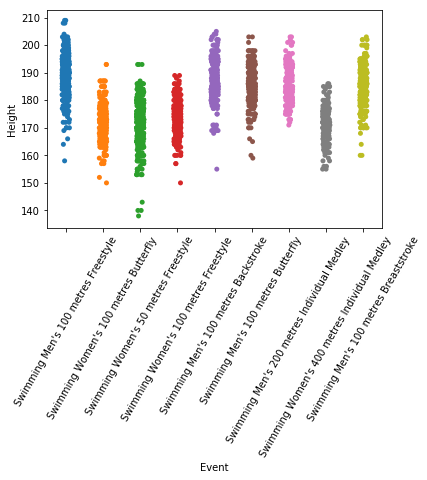

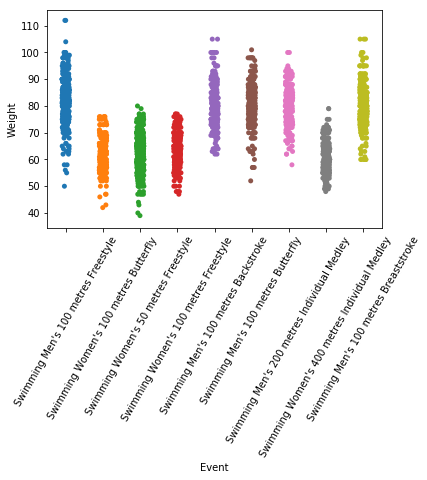

In [60]:
# df_joined[df_joined.Sport.unique()]
tmp = df_joined.loc[df_joined.Sport == 'Swimming', ['Event', 'Height', 'Weight']]
swimming_events = pd.Series(tmp.Event.unique()[1:10])
# print()

plt.figure()
sns.stripplot(x='Event', y='Height', data=tmp.loc[tmp.Event.isin(swimming_events)])
plt.xticks(rotation=60)
plt.show()
plt.figure()
sns.stripplot(x='Event', y='Weight', data=tmp.loc[tmp.Event.isin(swimming_events)])
plt.xticks(rotation=60)
plt.show()

In [61]:
missing_vals = df_joined.isna().sum(axis=0).reset_index()
missing_vals.columns = ['Label', 'Count']
missing_vals = missing_vals.loc[missing_vals.Count > 0]
missing_vals

,Label,Count
1,region,19
2,notes,104588
6,Age,15
7,Height,2840
8,Weight,3293
16,Medal,90876


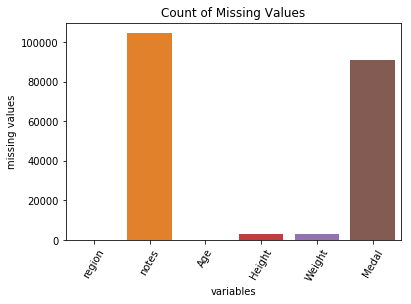

In [62]:
plt.figure()
barplot = sns.barplot(x='Label', y='Count', data=missing_vals)
barplot.set(title='Count of Missing Values', xlabel='variables', ylabel='missing values')
plt.xticks(rotation=60)
plt.show()

In [63]:
# which country has the most medals?
print(df_events.isna().sum(axis=0).reset_index())
print(df_regions.isna().sum(axis=0).reset_index())

     index      0
0       ID      0
1     Name      0
2      Sex      0
3      Age     15
4   Height   2853
5   Weight   3306
6     Team      0
7      NOC      0
8    Games      0
9     Year      0
10  Season      0
11    City      0
12   Sport      0
13   Event      0
14   Medal  91052
    index    0
0     NOC    0
1  region    3
2   notes  209


In [64]:
swimming_events = df_joined.loc[df_joined.Sport == 'Swimming']
swimming_events = swimming_events.Event.unique()
event_subset = df_joined.Event.isin(swimming_events[11:20])
event_subset = df_joined.loc[event_subset]

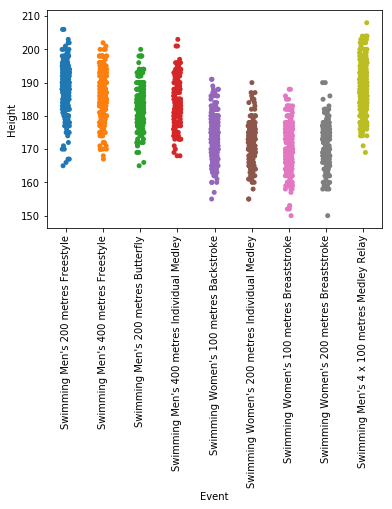

In [65]:
plt.figure()
sns.stripplot(x='Event', y='Height', data=event_subset)
plt.xticks(rotation=90)
plt.show()

In [66]:
swimming_events = df_joined.loc[df_joined.Sport == 'Swimming']
swimming_events_100m_subset = pd.Series(data=["Swimming Women's 100 metres Backstroke",
                        "Swimming Men's 100 metres Freestyle",
                        "Swimming Women's 100 metres Butterfly",
                        "Swimming Men's 100 metres Breaststroke",
                        "Swimming Women's 100 metres Freestyle",
                        "Swimming Men's 100 metres Backstroke",
                        "Swimming Men's 100 metres Butterfly",
                        "Swimming Women's 100 metres Breaststroke",
                        "Swimming Men's 100 Yard Backstroke",
                        "Swimming Men's 100 yard Freestyle"])
swimming_events_100m = swimming_events.loc[swimming_events.Event.isin(swimming_events_100m_subset)]

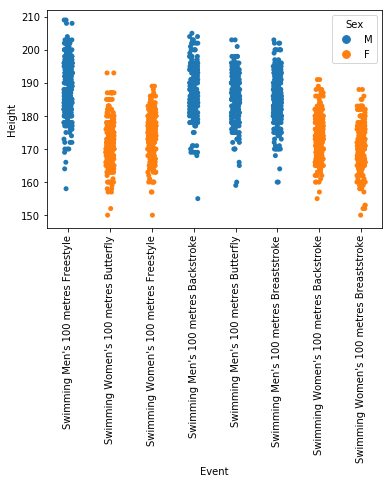

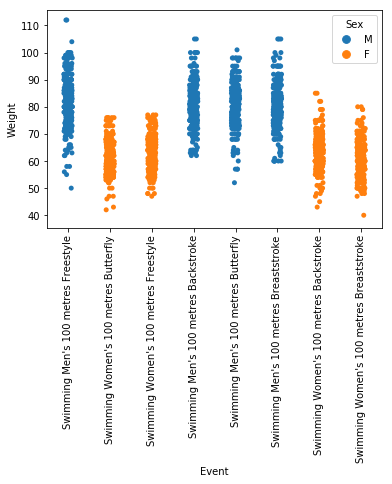

In [67]:
plt.figure()
sns.stripplot(x='Event', y='Height', hue='Sex', data=swimming_events_100m)
plt.xticks(rotation=90)
plt.show()

plt.figure()
sns.stripplot(x='Event', y='Weight', hue='Sex', data=swimming_events_100m)
plt.xticks(rotation=90)
plt.show()

In [68]:
swimming_events_100m.loc['Placed'] = swimming_events_100m.Medal.apply(lambda x: 1 if pd.isnull(x) else 0)
se100m_winners = swimming_events_100m.loc[~swimming_events_100m.Medal.isnull()]

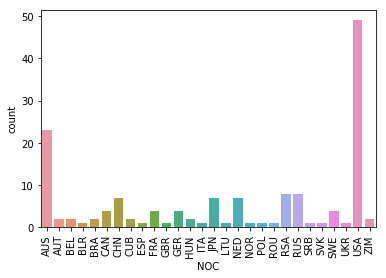

In [69]:
plt.figure()
# swimming_events_100m.groupby('NOC').Placed.sum()
sns.countplot('NOC', data = se100m_winners)
plt.xticks(rotation=90)
plt.show()

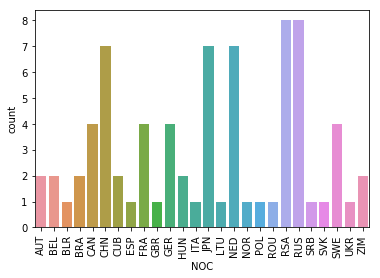

In [70]:
plt.figure()
# swimming_events_100m.groupby('NOC').Placed.sum()
sns.countplot('NOC', data = se100m_winners.loc[~se100m_winners.NOC.isin(['USA','AUS'])])
plt.xticks(rotation=90)
plt.show()

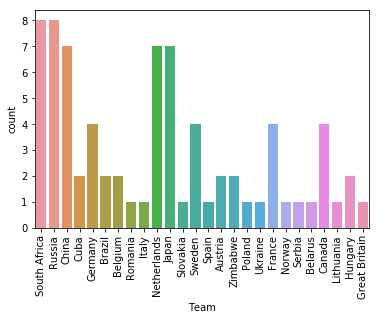

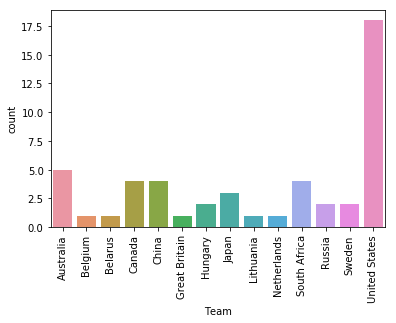

In [71]:
# plt.figure()
# swimming_events_100m.groupby('NOC').Placed.sum()
# sns.stripplot('NOC', data = se100m_winners.loc[~se100m_winners.NOC.isin(['USA','AUS'])],
#              hue="event")
# plt.xticks(rotation=90)
# plt.show()
# se100m_winners.loc[~se100m_winners.NOC.isin(['USA','AUS']), ['Year', 'Event', 'NOC', 'region']].sort_values(by='Year')
plt.figure()
sns.countplot('Team', data = se100m_winners.loc[~se100m_winners.NOC.isin(['USA','AUS']), ['Year', 'Event', 'Team', 'region']].sort_values(by='Year'))
plt.xticks(rotation=90)
plt.show()

# se100m_winners.loc[se100m_winners.NOC == 'NED', ['Year', 'Event']].sort_values('Year')
# se100m_winners.loc[se100m_winners.Year.isin([2012,2016]), ['Year', 'Event', 'region']].sort_values(by=['Year', 'Event'])
plt.figure()
sns.countplot('Team', data = se100m_winners.loc[se100m_winners.Year.isin([2012,2016]), ['Year', 'NOC', 'Event', 'Team']])
plt.xticks(rotation=90)
plt.show()

<Figure size 432x288 with 0 Axes>

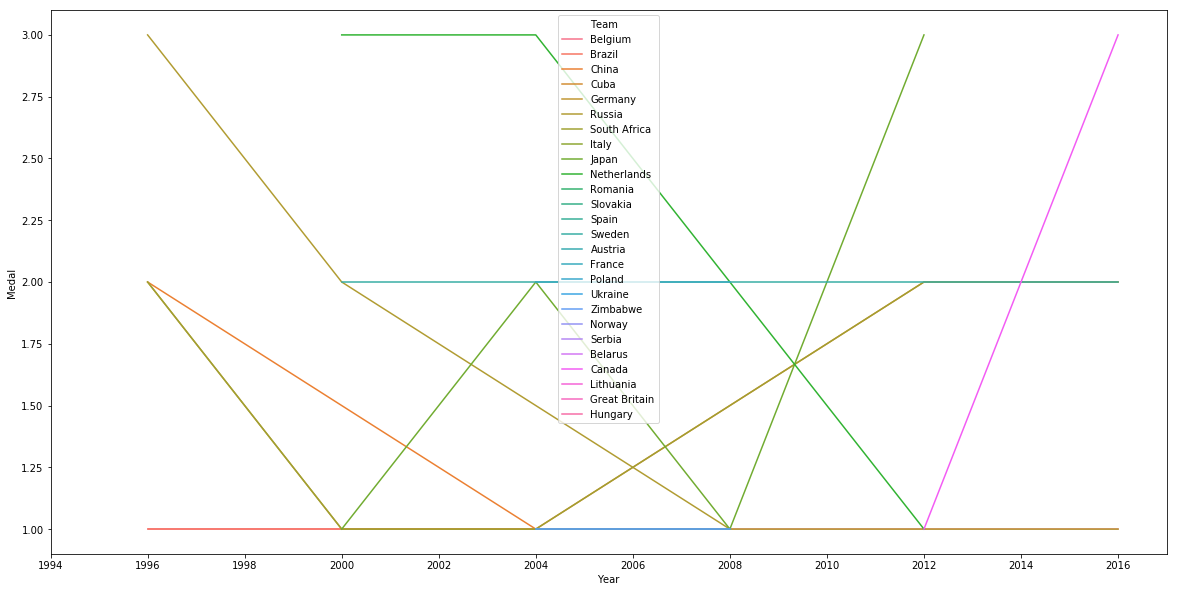

In [72]:
# se100m_winners.head(5)
tmp = se100m_winners.groupby(['Year','Team']).count().Medal.reset_index()
# tmp.Year = pd.to_datetime(tmp.Year, yearfirst=True)
# print(tmp)
champs = tmp.loc[(tmp.Medal > 5) | (tmp.Medal == 0)].Team.unique()
tmp = tmp.loc[~tmp.Team.isin(champs)]

plt.figure()
plt.subplots(figsize=(20,10))
sns.lineplot(x="Year", y="Medal", hue = 'Team',
             data=tmp)
plt.xticks(np.linspace(1994, 2016, num=12))
plt.show()

In [73]:
# olympics[[olympics.Event = ]]
swimming_events_100m_subset = pd.Series(data=["Swimming Women's 100 metres Backstroke",
                        "Swimming Men's 100 metres Freestyle",
                        "Swimming Women's 100 metres Butterfly",
                        "Swimming Men's 100 metres Breaststroke",
                        "Swimming Women's 100 metres Freestyle",
                        "Swimming Men's 100 metres Backstroke",
                        "Swimming Men's 100 metres Butterfly",
                        "Swimming Women's 100 metres Breaststroke",
                        "Swimming Men's 100 Yard Backstroke",
                        "Swimming Men's 100 yard Freestyle"])
olympics = olympics.loc[olympics.Year >= 1994]
swimming_subset = olympics.loc[olympics.Event.isin(swimming_events_100m_subset)]
swimming_subset = swimming_subset.loc[pd.notnull(swimming_subset.Medal)].groupby('Team').Team.count()

df2 = pd.DataFrame(data = {'Medals':swimming_subset}, index=swimming_subset.index).reset_index()
print(df2.sort_values(by='Medals'))
trace2 = go.Choropleth(
            locations = df2['Team'],
            locationmode='country names',
            z = df2['Medals'],
            text = df2['Team'],
            autocolorscale = False,
            reversescale = True,
            colorscale = 'Viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 1)
            ),
            colorbar = dict(
                title = 'Medals',
                tickprefix = '')
        )

data2 = [trace2]
layout = go.Layout(
    title = 'Medal Density of Swimming 100m Events Men and Women',
    geo = dict(
        showframe = True,
        showlakes = True,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig2 = dict( data=data2, layout=layout )
iplot(fig2)

             Team  Medals
14      Lithuania       1
26        Ukraine       1
2         Belarus       1
24          Spain       1
22       Slovakia       1
21      Singapore       1
20         Serbia       1
18        Romania       1
17         Poland       1
16         Norway       1
10  Great Britain       1
12          Italy       1
28       Zimbabwe       2
7            Cuba       2
4          Brazil       2
3         Belgium       2
1         Austria       2
11        Hungary       2
9         Germany       4
8          France       4
5          Canada       4
25         Sweden       4
13          Japan       7
15    Netherlands       7
6           China       7
19         Russia       8
23   South Africa       8
0       Australia      23
27  United States      49


**Track and Field: 100M Sprint**

In [74]:
data= pd.read_csv('../input/athlete_events.csv')

In [75]:
track_data_men = data.loc[data['Event'] == "Athletics Men's 100 metres"]

In [76]:
array = ['Gold', 'Silver','Bronze']
men_winners = track_data_men.loc[track_data_men['Medal'].isin(array)]

This dataset focuses on the Medal winners out the Men's 100m

In [77]:
men_winners.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
915,519,Harold Maurice Abrahams,M,24.0,183.0,75.0,Great Britain,GBR,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's 100 metres,Gold
12653,6890,Donovan Bailey,M,28.0,183.0,82.0,Canada,CAN,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 100 metres,Gold
12684,6901,Emmanuel McDonald Bailey,M,31.0,180.0,65.0,Great Britain,GBR,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Men's 100 metres,Bronze
12940,7038,Walter Thane Baker,M,25.0,183.0,72.0,United States,USA,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Men's 100 metres,Silver
14645,7894,Nigel Chase Barker,M,23.0,NaN,NaN,Australia,AUS,1906 Summer,1906,Summer,Athina,Athletics,Athletics Men's 100 metres,Bronze


In [78]:
Men_numeric = men_winners[['Age','Height','Weight']]
Men_numeric.describe()

,Age,Height,Weight
count,88.000000,84.000000,84.000000
mean,24.056818,179.583333,74.452381
std,3.178078,6.826963,8.783068
min,18.000000,167.000000,56.000000
25%,22.000000,175.000000,69.000000
50%,23.500000,180.000000,74.000000
75%,26.000000,183.000000,80.000000
max,34.000000,196.000000,95.000000


The basic descriptive statistics of the numerical variables. There were 4 instances in the early olympics that did not record the height and weight of the athletes. This result is interesting as we can see that there is a big difference in weight. When comparing the 25th and 75th percentile for height we see that there is only a 8cm difference whereas with weight that is 11kgs. It shows that most winners are close in height but could have a huge difference in weight. They are also very close in age only being between 22 and 26. Interestingly, the heaviest and tallest athlete is Usain Bolt. There are 30 bronze medals(instead of 29) because in 1896, 2 athletes drew for the bronze medal.

Medal
Bronze    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Gold      [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Silver    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

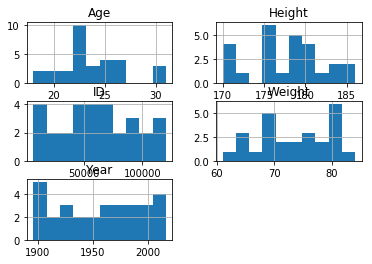

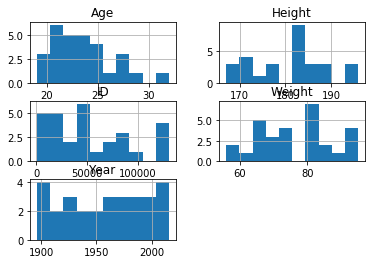

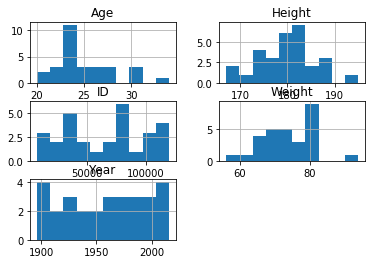

In [79]:
men_winners.groupby('Medal').hist()

The above plots are to see the individual statistics by Medal type. The Year is not very useful, but looking at age we see that the majority for all medal types seem to between 20-25 region. Although bronze medalists tend to be 175-180, Gold and Silver medalists tend to be taller than 180cm. The same applies for weight in that bronze medalists where we see that many are below 70kg and between 70-80kg, but in the other medals they are predominantly 80kg or over.


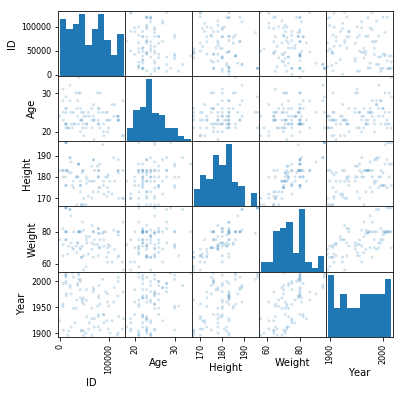

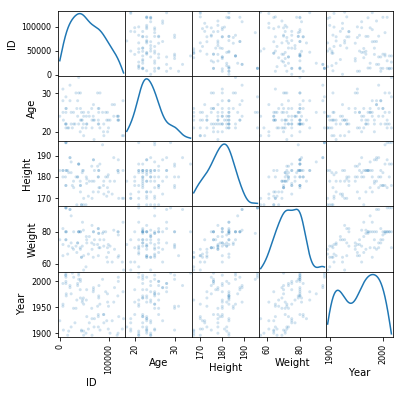

In [80]:
from pandas.plotting import scatter_matrix
scatter_matrix(men_winners, alpha=0.2, figsize=(6, 6), diagonal='hist')
scatter_matrix(men_winners, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

Next to see if there is any relationship between the variables. There is no observable patterns, apart from the Height and Weight having a linear relationship.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



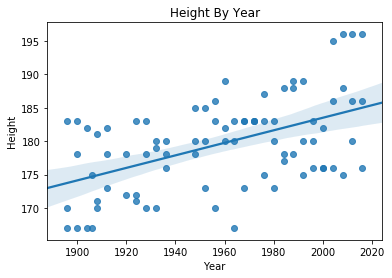

In [81]:
heightplot = sns.regplot(x="Year", y="Height", data=men_winners,)
heightplot.set_title('Height By Year')
heightplot.set_xlabel('Year')
heightplot.set_ylabel('Height')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



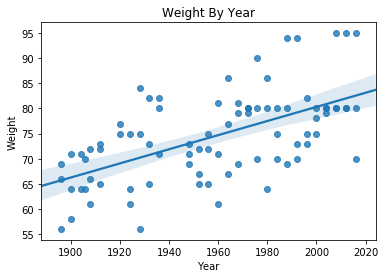

In [82]:
weightplot = sns.regplot(x="Year", y="Weight", data=men_winners)
weightplot.set_title('Weight By Year')
weightplot.set_xlabel('Year')
weightplot.set_ylabel('Weight')
plt.show()

In [ ]:
ageplot = sns.regplot(x="Year", y="Age", data=men_winners)
ageplot.set_title('Age By Year')
ageplot.set_xlabel('Year')
ageplot.set_ylabel('Age')
plt.show()

The 3 plots above look at Heigh,Weight and Age across Time. We see that as the sport is gets more competitive the athletes are coming in heavier and taller as this could give them a slight edge. What was suprising to see is that this pattern also applies for age. As the years go by, training methods and healthcare is improving, allowing older athletes to compete and do well in the olympics.

In [83]:
men_winners.groupby('Team').size().reset_index(name='Medal Count').sort_values(by=['Medal Count'],ascending=False)

,Team,Medal Count
17,United States,41
6,Great Britain,8
8,Jamaica,8
3,Canada,6
16,Trinidad and Tobago,4
5,Germany,4
0,Australia,3
4,Cuba,2
15,Soviet Union,2
9,Namibia,2


Looking at the plot above although we see that out of the 206 participating countries only 18 countries have won medals. 41 of the 88 have gone to the USA, showing that they are a great team for the Men's 100m across olympic history.

In [84]:
men_recent_winners = men_winners[men_winners.Year > 1992]
men_recent_winners

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
12653,6890,Donovan Bailey,M,28.0,183.0,82.0,Canada,CAN,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 100 metres,Gold
22991,12086,Yohan Blake,M,22.0,180.0,80.0,Jamaica,JAM,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 100 metres,Silver
24711,12946,Ato Jabari Boldon,M,22.0,176.0,75.0,Trinidad and Tobago,TTO,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 100 metres,Bronze
24713,12946,Ato Jabari Boldon,M,26.0,176.0,75.0,Trinidad and Tobago,TTO,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's 100 metres,Silver
24877,13029,Usain St. Leo Bolt,M,21.0,196.0,95.0,Jamaica,JAM,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,Gold
24880,13029,Usain St. Leo Bolt,M,25.0,196.0,95.0,Jamaica,JAM,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 100 metres,Gold
24883,13029,Usain St. Leo Bolt,M,29.0,196.0,95.0,Jamaica,JAM,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,Gold
50819,26135,Andre De Grasse,M,21.0,176.0,70.0,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,Bronze
56242,28811,Walter Dix,M,22.0,175.0,80.0,United States,USA,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,Bronze
72621,36933,"Frank ""Frankie"" Fredericks",M,28.0,180.0,73.0,Namibia,NAM,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 100 metres,Silver


In [85]:
men_recent_winners.groupby('Team').size().reset_index(name='Medal Count').sort_values(by=['Medal Count'],ascending=False)


,Team,Medal Count
6,United States,6
2,Jamaica,4
5,Trinidad and Tobago,3
1,Canada,2
0,Barbados,1
3,Namibia,1
4,Portugal,1


If we look at the subset of winners in this event in the recent years we see that the difference between Jamaica and USA is much smaller, showing that they have been getting more medal winners in this category in recent years.

**Figure Skating**



In [86]:
data = pd.read_csv('../input/athlete_events.csv')
noc = pd.read_csv('../input/noc_regions.csv')

Figure skating has been an Olympic sport since the 1908 Summer Olympics. There are a total of 5 events within the category, a solo event for men and women, and 3 paired events. Originally it started as Men's Singles, Women's Singles, and Mixed Pairs, but in 1976 Ice Dancing became an event and in 2014 a Mixed Team event was also created. In this exploratory data analysis we will focus on the single events.

In [87]:
print(data[data['Sport'] == 'Figure Skating'].groupby('Event').Event.count())

Event
Figure Skating Men's Singles            506
Figure Skating Men's Special Figures      3
Figure Skating Mixed Ice Dancing        456
Figure Skating Mixed Pairs              704
Figure Skating Mixed Team                74
Figure Skating Women's Singles          555
Name: Event, dtype: int64


In [88]:
print(data[data['Sport'] == 'Figure Skating'].groupby('Event').Event.count())

Event
Figure Skating Men's Singles            506
Figure Skating Men's Special Figures      3
Figure Skating Mixed Ice Dancing        456
Figure Skating Mixed Pairs              704
Figure Skating Mixed Team                74
Figure Skating Women's Singles          555
Name: Event, dtype: int64


In [89]:
print(data[data['Event'] == "Figure Skating Men's Special Figures"])

           ID   ...     Medal
47130   24288   ...    Silver
88830   45041   ...    Bronze
123223  62264   ...      Gold

[3 rows x 15 columns]


In [90]:
print(data[data['Event'] == 'Figure Skating Mixed Pairs'].groupby(['Year','Team']).ID.count().head(10))

Year  Team           
1908  Germany            2
      Great Britain-1    2
      Great Britain-2    2
1920  Belgium            2
      Finland            2
      France             2
      Great Britain-1    2
      Great Britain-2    2
      Great Britain-3    2
      Norway             2
Name: ID, dtype: int64


We see that the data contains two athlete ID's per team for mixed pairs event.

In [91]:
print(data.groupby('Sport').Age.mean().sort_values(ascending=True).head())

Sport
Rhythmic Gymnastics      18.737082
Swimming                 20.566803
Figure Skating           22.232190
Synchronized Swimming    22.366851
Diving                   22.481441
Name: Age, dtype: float64


In [92]:
mfs = data[data['Event'] == "Figure Skating Men's Singles"]
ffs = data[data['Event'] == "Figure Skating Women's Singles"]

In [93]:
print(mfs.shape,"\n", ffs.shape)

(506, 15) 
 (555, 15)


In [94]:
## For Men
print(mfs.mean(), '\n')
print(mfs.median())

ID        68477.148221
Age          22.305221
Height      173.397626
Weight       65.591640
Year       1975.774704
dtype: float64 

ID        67969.0
Age          22.0
Height      174.0
Weight       65.0
Year       1980.0
dtype: float64


In [95]:
## For Women
print(ffs.mean(), '\n')
print(ffs.median())

ID        67936.933333
Age          19.414545
Height      161.313351
Weight       51.119403
Year       1974.850450
dtype: float64 

ID        65847.0
Age          19.0
Height      162.0
Weight       51.0
Year       1976.0
dtype: float64


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



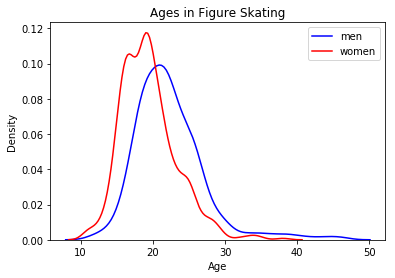

In [96]:
sns.distplot(mfs.Age.dropna(), color = 'blue', hist = False, label='men')
sns.distplot(ffs.Age.dropna(), color = 'red', hist = False, label='women')
plt.ylabel('Density')
plt.title('Ages in Figure Skating')
plt.show()

Pretty hard cutoff by 30 for women, and most women appear to be under twenty years old. Men's age is more normally distributed, with some athletes that compete over 30.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



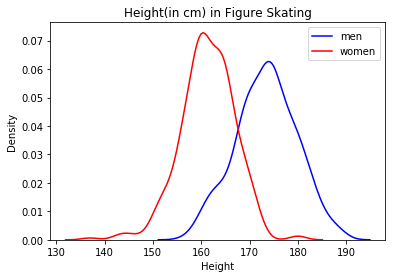

In [97]:
sns.distplot(mfs.Height.dropna(), color = 'blue', hist=False, label = 'men')
sns.distplot(ffs.Height.dropna(), color = 'red', hist=False, label = 'women')
plt.ylabel('Density')
plt.title('Height(in cm) in Figure Skating')
plt.show()

Nothing particularly exciting about this graph. Both genders have normally distributed heights.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



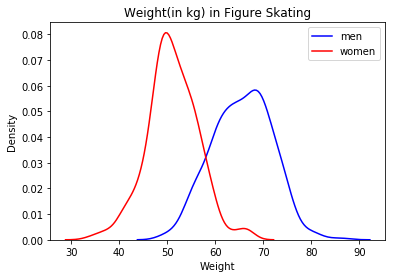

In [98]:
sns.distplot(mfs.Weight.dropna(), color = 'blue', hist=False, label = 'men')
sns.distplot(ffs.Weight.dropna(), color = 'red', hist=False, label = 'women')
plt.ylabel('Density')
plt.title('Weight(in kg) in Figure Skating')
plt.show()

More normal curves. Are figure skaters potentially underweight for their respective heights/age? One way to test this is with BMI (not the most reliable methods, but possible given our data).

In [99]:
tempm = mfs[['Weight', 'Height']].dropna()
tempf = ffs[['Weight', 'Height']].dropna()
tempm.Height = tempm.Height/100.0
tempf.Height = tempf.Height/100.0
BMIm = tempm.Weight/(tempm.Height*tempm.Height)
BMIf = tempf.Weight/(tempf.Height*tempf.Height)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



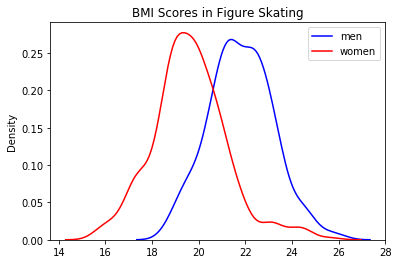

In [100]:
sns.distplot(BMIm, color = 'blue', hist=False, label = 'men')
sns.distplot(BMIf, color = 'red', hist=False, label= 'women')
plt.ylabel('Density')
plt.title('BMI Scores in Figure Skating')
plt.show()


A "healthy" BMI value is considered to be between 18.5 to 24. We can see here that the men mostly fit into that area, but female figure skaters have a lower BMI overall. Could these lower BMI values be associated with what country these athletes are coming from?

In [101]:
tempbmi = ffs.loc[BMIf.index,['Name','Team', 'Age', 'NOC', 'Year', 'Medal']]
tempbmi['BMI'] = BMIf
tempbmi = pd.merge(tempbmi, noc, how='left', on ='NOC')

In [102]:
print(tempbmi.groupby('region').BMI.mean().sort_values(ascending=True).head(10), "\n")
print(tempbmi.groupby('region').BMI.mean().sort_values(ascending=True).tail(10), "\n")

region
Georgia        16.015625
Serbia         17.922430
Estonia        17.998163
Uzbekistan     18.016975
Belgium        18.044094
Croatia        18.101601
South Korea    18.160815
Spain          18.573445
Ukraine        18.824826
Switzerland    18.842865
Name: BMI, dtype: float64 

region
Belarus         20.312500
Sweden          20.339638
UK              20.432662
Italy           20.611400
Canada          20.805123
Latvia          20.820940
North Korea     21.333333
Hungary         22.316915
South Africa    23.046875
Turkey          23.140496
Name: BMI, dtype: float64 



We see that while some countries have good BMI score means, others have a low mean value.

### Medals Won in Figure Skating

In [103]:
mfs = pd.merge(mfs, noc, how='left', on='NOC')
ffs = pd.merge(ffs, noc, how='left', on='NOC')

#### Medals per NOC Committee

In [104]:

## Total medals for men's singles by country
menmedals = mfs.groupby('region').Medal.count().sort_values(ascending=False)
print(menmedals.head(10), "\n\n\n")

## Total medels for women's singles by country
womenmedals = ffs.groupby('region').Medal.count().sort_values(ascending=False)
print(womenmedals.head(10))

region
USA               15
Russia            10
Canada             9
Austria            8
Sweden             7
France             5
Czech Republic     4
Germany            3
Switzerland        3
Japan              2
Name: Medal, dtype: int64 



region
USA            23
Germany         7
Austria         7
UK              6
Canada          5
Russia          4
Sweden          3
Japan           3
Norway          3
Netherlands     3
Name: Medal, dtype: int64


We see some similar countries, such as the USA, Russia, Austria, and Germany that are top competitors for both the men's and women's events.

In [105]:
## Medals won per Rank per Country
print(mfs.groupby(['region', 'Medal']).Medal.count().sort_values(ascending = False).head(15), "\n\n\n\n")
print(ffs.groupby(['region', 'Medal']).Medal.count().sort_values(ascending = False).head(15))

region          Medal 
USA             Gold      7
                Bronze    5
Canada          Silver    5
Russia          Gold      5
Canada          Bronze    4
Sweden          Gold      4
Russia          Silver    4
France          Bronze    4
USA             Silver    3
Austria         Gold      3
                Silver    3
Czech Republic  Bronze    2
Germany         Silver    2
Austria         Bronze    2
Sweden          Silver    2
Name: Medal, dtype: int64 




region       Medal 
USA          Bronze    8
             Silver    8
             Gold      7
Austria      Silver    4
Germany      Gold      3
UK           Bronze    3
Norway       Gold      3
China        Bronze    2
Japan        Silver    2
Germany      Bronze    2
Russia       Bronze    2
Netherlands  Silver    2
Germany      Silver    2
Canada       Bronze    2
UK           Gold      2
Name: Medal, dtype: int64


In [106]:
print(mfs.groupby('Medal').region.nunique(), '\n\n\n')
print(ffs.groupby('Medal').region.nunique())

Medal
Bronze    12
Gold       8
Silver    10
Name: region, dtype: int64 



Medal
Bronze    11
Gold      12
Silver    10
Name: region, dtype: int64


In [107]:
print(mfs.groupby('region').Medal.count().sort_values(ascending=False).head(10), '\n\n\n')
print(ffs.groupby('region').Medal.count().sort_values(ascending=False).head(10))

region
USA               15
Russia            10
Canada             9
Austria            8
Sweden             7
France             5
Czech Republic     4
Germany            3
Switzerland        3
Japan              2
Name: Medal, dtype: int64 



region
USA            23
Germany         7
Austria         7
UK              6
Canada          5
Russia          4
Sweden          3
Japan           3
Norway          3
Netherlands     3
Name: Medal, dtype: int64


In [108]:
## Number of NOC committees participating per event
print(ffs.region.nunique())
print(mfs.region.nunique(), '\n')

## Number of Medals obtained from 1908 to 2014 per event
print(mfs.Medal.count())
print(ffs.Medal.count())

44
44 

72
72


We see that out of 44 countries that compete, very few of them have ever achieved medalists (less than half of them receive any medals at all). For female athletes in particular, the USA alone won almost one third of all possible medals in the singles event for the entire lifetime of the event at the Olympics.

In [109]:
## The number of medals won per athlete
m_med = mfs.groupby(['Name', 'Team']).Medal.count()
f_med = ffs.groupby(['Name', 'Team']).Medal.count()
print(m_med.sort_values(ascending=False).head(10), '\n\n\n')
print(f_med.sort_values(ascending=False).head(10))

Name                                   Team         
Gillis Emanuel Grafstrm                Sweden           4
Yevgeny Viktorovich Plyushchenko       Russia           3
Richard Totten "Dick" Button           United States    2
Patrick Henri Pera                     France           2
Philippe Christophe Luciene Candeloro  France           2
Elvis Stojko                           Canada           2
David Wilkinson Jenkins                United States    2
Brian Ernest Orser                     Canada           2
Wilhelm Richard "Willy" Bckl           Austria          2
Karl Martin Alois Schfer               Austria          2
Name: Medal, dtype: int64 



Name                                                Team         
Sonja Henie (-Topping, -Gardiner, -Onstad)          Norway           3
Nancy Ann Kerrigan (-Solomon)                       United States    2
Chen Lu                                             China            2
Yu-Na Kim                                           South 

The highest number of Medals won by an Olympic Figure Skater was 4. We see that it is not too uncommon for figure skaters to attempt multiple years if they were successful previously.

In [110]:
## The number of Olympics participated in per athlete
m_oly = mfs.groupby(['Name', 'Team']).Year.nunique()
f_oly = ffs.groupby(['Name', 'Team']).Year.nunique()
print(m_oly.sort_values(ascending=False).head(10), '\n\n\n')
print(f_oly.sort_values(ascending=False).head(10))

Name                      Team          
Brian Joubert             France            4
Jan Hoffmann              East Germany      4
Gillis Emanuel Grafstrm   Sweden            4
Elvis Stojko              Canada            4
Jean-Christophe Simond    France            3
Jung Sung-Il              South Korea       3
Steven Cousins            Great Britain     3
Karl Martin Alois Schfer  Austria           3
Ivan Bozhidarov Dinev     Bulgaria          3
Tom Verner                Czech Republic    3
Name: Year, dtype: int64 



Name                                        Team         
Laetitia Hubert                             France           4
Jlia Sebestyn                               Hungary          4
Olena Anatolivna Liashenko                  Ukraine          4
Sonja Henie (-Topping, -Gardiner, -Onstad)  Norway           4
Irina Eduardovna Slutskaya                  Russia           3
Jelena Glebova                              Estonia          3
Elene Gedevanishvili              

It will probably be more interesting to observe the proportion between their medal count and Olympic attempts (their "success rate" at the Olympic Games).

In [111]:
m_attempt = pd.merge(pd.DataFrame(m_med).reset_index(), pd.DataFrame(m_oly).reset_index(), on = 'Name')
f_attempt = pd.merge(pd.DataFrame(f_med).reset_index(), pd.DataFrame(f_oly).reset_index(), on = 'Name')
m_attempt['Prop'] = m_attempt.Medal/m_attempt.Year
f_attempt['Prop'] = f_attempt.Medal/f_attempt.Year

In [112]:
print(m_attempt.loc[:,['Name','Team_x','Medal','Prop']].sort_values(['Prop','Medal'], ascending = False).head(10))

                                      Name         Team_x  Medal  Prop
90                 Gillis Emanuel Grafstrm         Sweden      4   1.0
346       Yevgeny Viktorovich Plyushchenko         Russia      3   1.0
32                      Brian Ernest Orser         Canada      2   1.0
52                 David Wilkinson Jenkins  United States      2   1.0
234                     Patrick Henri Pera         France      2   1.0
250  Philippe Christophe Luciene Candeloro         France      2   1.0
258           Richard Totten "Dick" Button  United States      2   1.0
336           Wilhelm Richard "Willy" Bckl        Austria      2   1.0
9             Aleksey Yevgenyevich Urmanov         Russia      1   1.0
10            Aleksey Yevgenyevich Urmanov         Russia      1   1.0


In [113]:
print(f_attempt.loc[:,['Name','Team_x','Medal','Prop']].sort_values(['Prop','Medal'], ascending = False).head(10))

                                                  Name ...  Prop
211                                      Katarina Witt ...   2.0
41                  Beatrix Suzetta Loughran (-Harvey) ...   1.0
52                    Carol Elizabeth Heiss (-Jenkins) ...   1.0
123  Friederike "Fritzi" Burger (-Nishikawa-, -Russ... ...   1.0
181                  Jeannette Eleanor Altwegg (-Wirz) ...   1.0
210                                      Katarina Witt ...   1.0
292                     Michelle Wingshan Kwan (-Pell) ...   1.0
306                      Nancy Ann Kerrigan (-Solomon) ...   1.0
383         Tenley Emma Albright (-Gardiner, -Blakely) ...   1.0
413                                          Yu-Na Kim ...   1.0

[10 rows x 4 columns]


We see that Gillis Emanuel Grafström was the only athlete in figure skating to win 4 medals over 4 Olympic Games. However, there were several strong athletes that came back to the Olympics to win a second medal. We do see some problems though. Aleksey Yevgenyevich Urmanov is listed twice for males, which seems odd. We also see something wrong for Katarina Witt in East Germany. So we need investigate further.

In [114]:
print(data[data['Name'] == 'Aleksey Yevgenyevich Urmanov'].loc[:,['Name','Team','NOC','Year','Medal']], '\n\n\n')

                                Name          Team  NOC  Year Medal
246648  Aleksey Yevgenyevich Urmanov  Unified Team  EUN  1992   NaN
246649  Aleksey Yevgenyevich Urmanov        Russia  RUS  1994  Gold 





In [115]:
print(data[data['Name'] == 'Katarina Witt'].loc[:,['Name','Team','NOC','Year', 'Medal']], '\n\n\n')

                 Name          Team  NOC  Year Medal
262129  Katarina Witt  East Germany  GDR  1984  Gold
262130  Katarina Witt  East Germany  GDR  1988  Gold
262131  Katarina Witt       Germany  GER  1994   NaN 





Because Katarina Witt participiated in Olymipcs from 1984 and 1994, her Team changed from East Germany to Germany after the reunification of Germany in 1989. From the actual data, we see she participated 3 times, and won 2 medals.

Participants

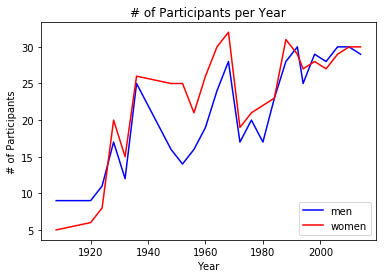

In [116]:
m = pd.DataFrame(mfs.groupby('Year').Name.count()).reset_index()
f = pd.DataFrame(ffs.groupby('Year').Name.count()).reset_index()

#plt.scatter(mfs.Year.unique(), mfs.groupby('Year').Name.count(), color = 'blue')
#plt.scatter(pd.DataFrame(ffs.groupby('Year').Name.count()).reindex())
plt.plot(m['Year'], m['Name'], color = 'blue', label = 'men')
plt.plot(f['Year'], f['Name'], color = 'red', label = 'women')
plt.xlabel('Year')
plt.ylabel('# of Participants')
plt.title('# of Participants per Year')
plt.legend(loc = 'lower right')
plt.show()


We see that the number of competitors in the events shifted drastically, and only stabilized close to above 25 competitors after the year 2000.

In [117]:
m_ppy = pd.DataFrame(mfs.groupby(['Year','region']).Name.nunique()).reset_index()
f_ppy = pd.DataFrame(ffs.groupby(['Year','region']).Name.nunique()).reset_index()

print(m_ppy[m_ppy['Year'] == 2014], '\n\n\n')
print(f_ppy[f_ppy['Year'] == 2014])

     Year          region  Name
306  2014       Australia     1
307  2014         Austria     1
308  2014         Belgium     1
309  2014          Canada     3
310  2014           China     1
311  2014  Czech Republic     2
312  2014         Estonia     1
313  2014          France     2
314  2014         Germany     1
315  2014          Israel     1
316  2014           Italy     1
317  2014           Japan     3
318  2014      Kazakhstan     2
319  2014     Philippines     1
320  2014         Romania     1
321  2014           Spain     2
322  2014          Sweden     1
323  2014             USA     2
324  2014         Ukraine     1
325  2014      Uzbekistan     1 



     Year          region  Name
312  2014       Australia     1
313  2014         Austria     1
314  2014          Brazil     1
315  2014          Canada     2
316  2014           China     2
317  2014  Czech Republic     1
318  2014         Estonia     1
319  2014          France     1
320  2014         Georgia     1
321 

For the 2014 Winter Olympics, Canada, Japan, and the USA brought a lot of members for both events.



In [118]:
m_ppy = m_ppy[m_ppy['Year'] >= 2000]
f_ppy = f_ppy[f_ppy['Year'] >= 2000]

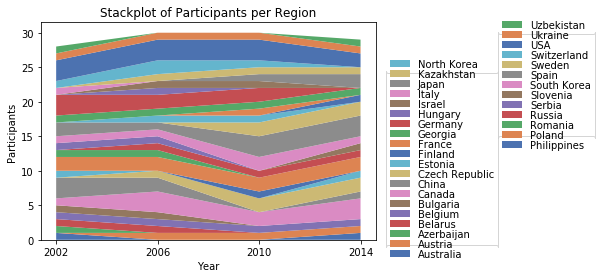

In [119]:
sns.set_palette('deep', 44)
plt.stackplot(m_ppy.pivot('Year','region','Name').index, np.transpose(m_ppy.pivot('Year','region', 'Name').fillna(0)))
l1 = plt.legend(bbox_to_anchor=(1.38, 0), labels = m_ppy.pivot('Year','region','Name').columns[0:20], labelspacing = -2)
l2 = plt.legend(bbox_to_anchor=(1.67,0.5), labels = m_ppy.pivot('Year', 'region', 'Name').columns[20:33], labelspacing = -2)
plt.gca().add_artist(l1)
plt.xlabel('Year')
plt.xticks([2002, 2006, 2010, 2014])
plt.ylabel('Participants')
plt.title('Stackplot of Participants per Region')
plt.show()

We see that in the four most recent Winter Olympics, countries like the USA, Japan, Canada, and France have been able to send multiple athletes for the men's single event. We see other countries such as North Korea, Poland, and Slovenia that were able to participate only once or twice, with only a single athlete representing their country.

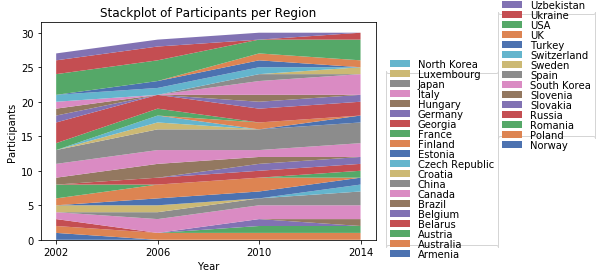

In [135]:

plt.stackplot(f_ppy.pivot('Year','region','Name').index, np.transpose(f_ppy.pivot('Year','region', 'Name').fillna(0)))
l1 = plt.legend(bbox_to_anchor=(1.38, 0), labels = f_ppy.pivot('Year','region','Name').columns[0:20], labelspacing = -2)
l2 = plt.legend(bbox_to_anchor=(1.67,0.5), labels = f_ppy.pivot('Year', 'region', 'Name').columns[20:35], labelspacing = -2)
plt.gca().add_artist(l1)
plt.xlabel('Year')
plt.xticks([2002, 2006, 2010, 2014])
plt.ylabel('Participants')
plt.title('Stackplot of Participants per Region')
plt.show()

For women, we see USA, Russia, Canada, and Japan that are able to send more than one athlete per Olympics. However, unlike the male teams, we see other countries such as China, Uzbekistan, and Australia that are more consistently able to compete in this event.

# Model

## Dendogram by Sport

In [122]:
olympics = pd.read_csv('../input/athlete_events.csv')
olympics = olympics.loc[olympics.Year >= 1994]

# Clean the Team column
# Some of the entries in the column contain the country name followed by a dash and a number, such as China-2.
pd.options.mode.chained_assignment = None
new_Team = [team[:-2] if team[-2] == '-' else team for team in olympics.Team]
olympics.Team = new_Team

top_countries = olympics.groupby('Team').Team.count().sort_values(ascending = False)[0:40,]
olympics = olympics.loc[olympics.Team.isin(top_countries.index)]

olympics_men = olympics.loc[olympics.Sex == 'M']
olympics_women = olympics.loc[olympics.Sex == 'F']

# Determine the most popular event within each sport category for men and women
df_men = olympics_men.groupby(['Sport','Event']).Sport.count()
sports_men = df_men.index.get_level_values(0)
events_men = df_men.loc[df_men.groupby(sports_men).idxmax()].index.get_level_values(level=1).tolist()

df_women = olympics_women.groupby(['Sport','Event']).Sport.count()
sports_women = df_women.index.get_level_values(0)
events_women = df_women.loc[df_women.groupby(sports_women).idxmax()].index.get_level_values(level=1).tolist()

olympics_men = olympics_men.loc[olympics_men.Event.isin(events_men)]
olympics_women = olympics_women.loc[olympics_women.Event.isin(events_women)]
medals_men = olympics_men.loc[pd.notnull(olympics_men.Medal)].groupby(['Team','Event']).Team.count().unstack(level=0).fillna(0)
medals_women = olympics_women.loc[pd.notnull(olympics_women.Medal)].groupby(['Team','Event']).Team.count().unstack(level=0).fillna(0)

This dendrogram shows how closely certain men's events from different sports are related, based on how countries perform in those events. For example: Judo is close to taekwondo Table tennis is close to badminton Freestyle skiing is close to figure skating and snowboarding, etc.

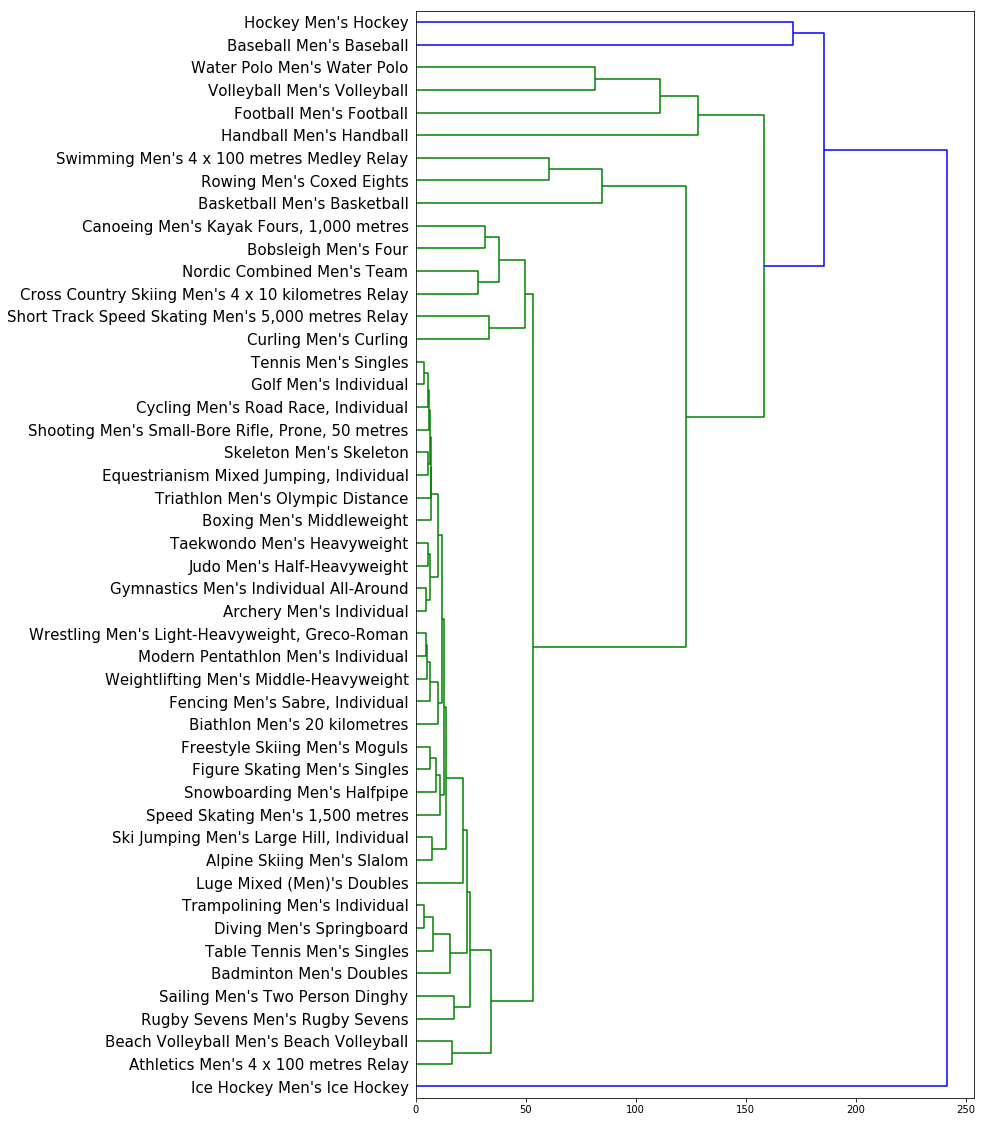

In [126]:

mergings_men = linkage(medals_men, method = 'ward')
plt.figure(figsize=(10,20))
dendrogram(mergings_men, labels = medals_men.index, leaf_rotation = 0, leaf_font_size=15, orientation='right')
plt.show()

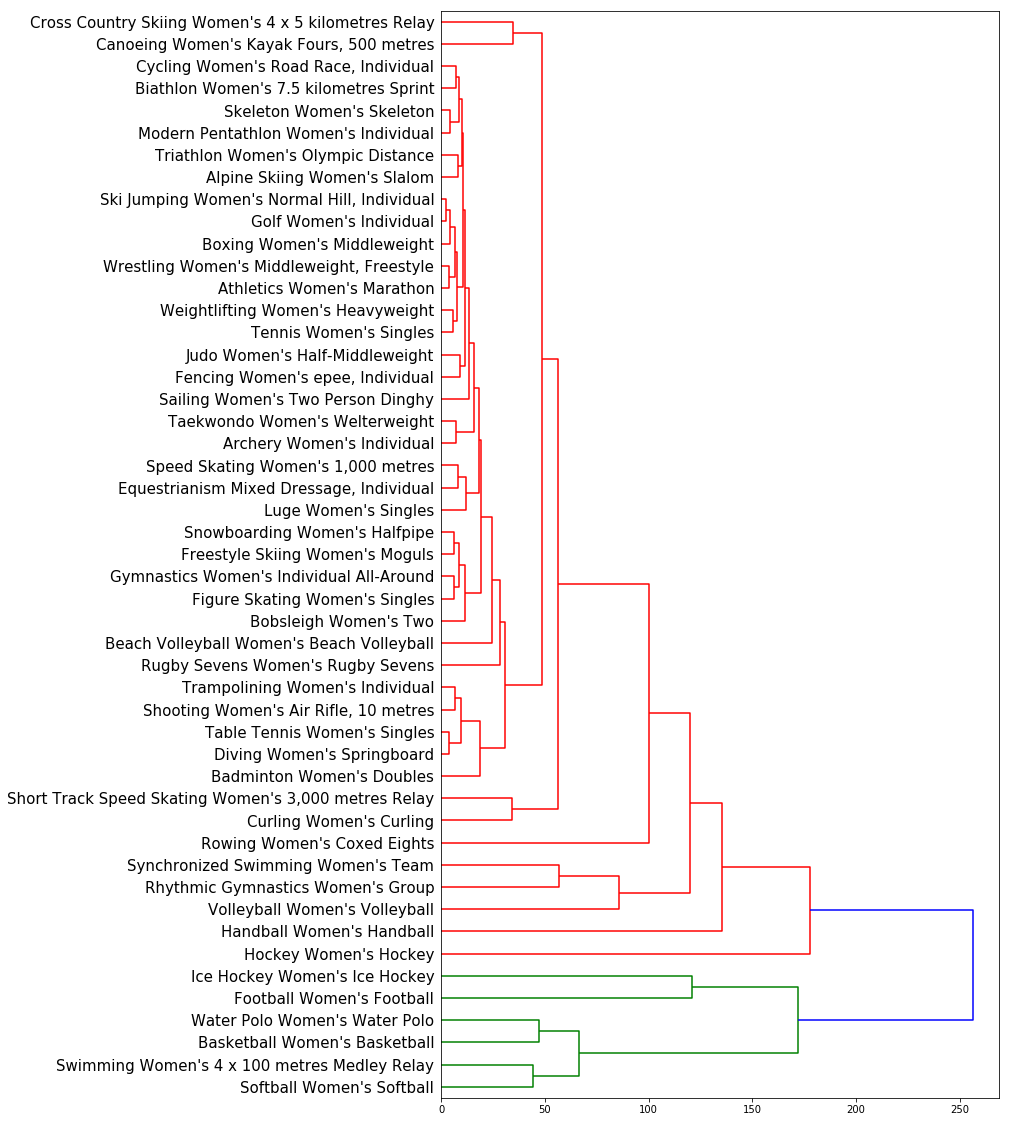

In [127]:
mergings_women = linkage(medals_women, method = 'ward')
plt.figure(figsize=(10,20))
dendrogram(mergings_women, labels = medals_women.index, leaf_rotation = 0, leaf_font_size=15, orientation='right')
plt.show()

## Country

In [128]:
olympics = olympics.loc[olympics.Year >= 1994]

# Clean the Team column
# Some of the entries in the column contain the country name followed by a dash and a number, such as China-2.
pd.options.mode.chained_assignment = None
new_Team = [team[:-2] if team[-2] == '-' else team for team in olympics.Team]
olympics.Team = new_Team

top_countries = olympics.groupby('Team').Team.count().sort_values(ascending = False)[0:40,]
olympics = olympics.loc[olympics.Team.isin(top_countries.index)]top_sports = olympics.groupby('Sport').Sport.count().sort_values(ascending=False)[0:40,]
olympics_top_sports = olympics.loc[olympics.Sport.isin(top_sports.index)]
olympics_our_sports = olympics[olympics.Sport.isin(['Swimming', 'Figure Skating', 'Table Tennis', 'Athletics'])]
medals_top_sports = olympics_top_sports.loc[pd.notnull(olympics_top_sports.Medal)].groupby(['Team','Sport']).Team.count().unstack().fillna(0)
medals_our_sports = olympics_our_sports.loc[pd.notnull(olympics_our_sports.Medal)].groupby(['Team','Sport']).Team.count().unstack().fillna(0)

This dendrogram shows how closely certain countries are related based on their performance in the most popular olympic sports. Many small European countries are clustered together, such as Slovenia, Estonia, Latvia, and Bulgaria.As we move down the dendrogram, we get to larger countries that have won more medals, such as Germany, Australia, and USA.

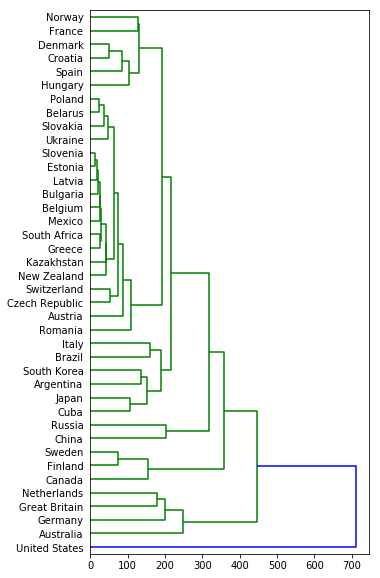

In [133]:
mergings_top_sports = linkage(medals_top_sports, method = 'ward')
plt.figure(figsize=(5,10))
dendrogram(mergings_top_sports, labels = medals_top_sports.index, leaf_rotation = 0, leaf_font_size = 10, orientation = 'right')
plt.show()

If we only consider our four sports, a lot of countries will be extremely close to each other, simply because they've won very few medals in these sports. For example, Argentina is represented by the point (0, 0, 1, 0), which means they have won 0 medals in athletics, figure skating, and table tennis, but 1 medal in swimming. Switzerland is represented by the point (0, 1, 0, 0), which means they have won 0 medals in athletics, swimming, and table tennis, but 1 medal in figure skating. So, the distance between Argentina and Switzerland is extremely small, because the values of their coordinates are almost all 0, meaning they will cluster together immediately.

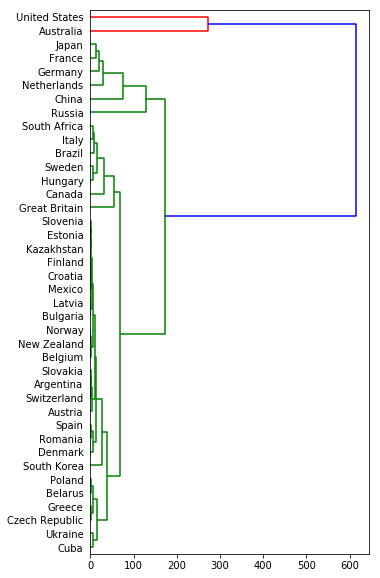

In [134]:
mergings_our_sports = linkage(medals_our_sports, method = 'ward')
plt.figure(figsize=(5,10))
dendrogram(mergings_our_sports, labels = medals_our_sports.index, leaf_rotation = 0, leaf_font_size = 10, orientation = 'right')
plt.show()